In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
f1_score,roc_curve,log_loss)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
scp= pd.read_csv('heartdisease_data.csv')
scp.head(5)

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


###### Performing EDA

In [3]:
# checking shape of data
scp.shape

(303, 14)

In [4]:
# replacing all '?' values with nan values
scp = scp.replace('?', np.nan).astype(float)

In [5]:
# checking data type
scp.dtypes

Age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

In [6]:
# checking null value
scp.isnull().sum()

Age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

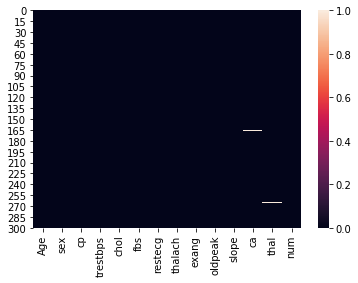

In [7]:
# heatmap of null value
sns.heatmap(scp.isnull())

In [8]:
#replacing nan value with median of column
scp = scp.groupby(scp.columns, axis = 1).transform(lambda columns: columns.fillna(columns.median()))
scp.sample(10)

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0.0
88,53.0,0.0,4.0,138.0,234.0,0.0,2.0,160.0,0.0,0.0,1.0,0.0,3.0,0.0
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1.0
225,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0.0
53,44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0,0.0
51,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0.0
14,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0.0
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0.0
56,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0,1.0
251,58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.0,7.0,1.0


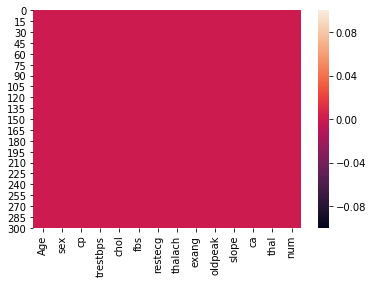

In [9]:
# heatmap of null value
sns.heatmap(scp.isnull())

In [10]:
#checking unique values
scp.nunique()

Age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

In [11]:
# checking the data description
scp.describe()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [12]:
# corelation between coloums
scp.corr()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


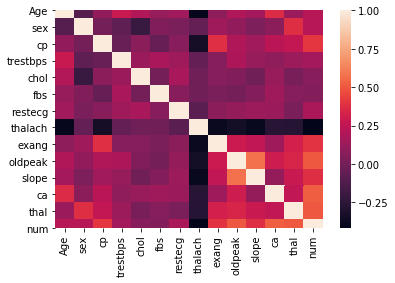

In [13]:
# heat map of corelation
sns.heatmap(scp.corr())

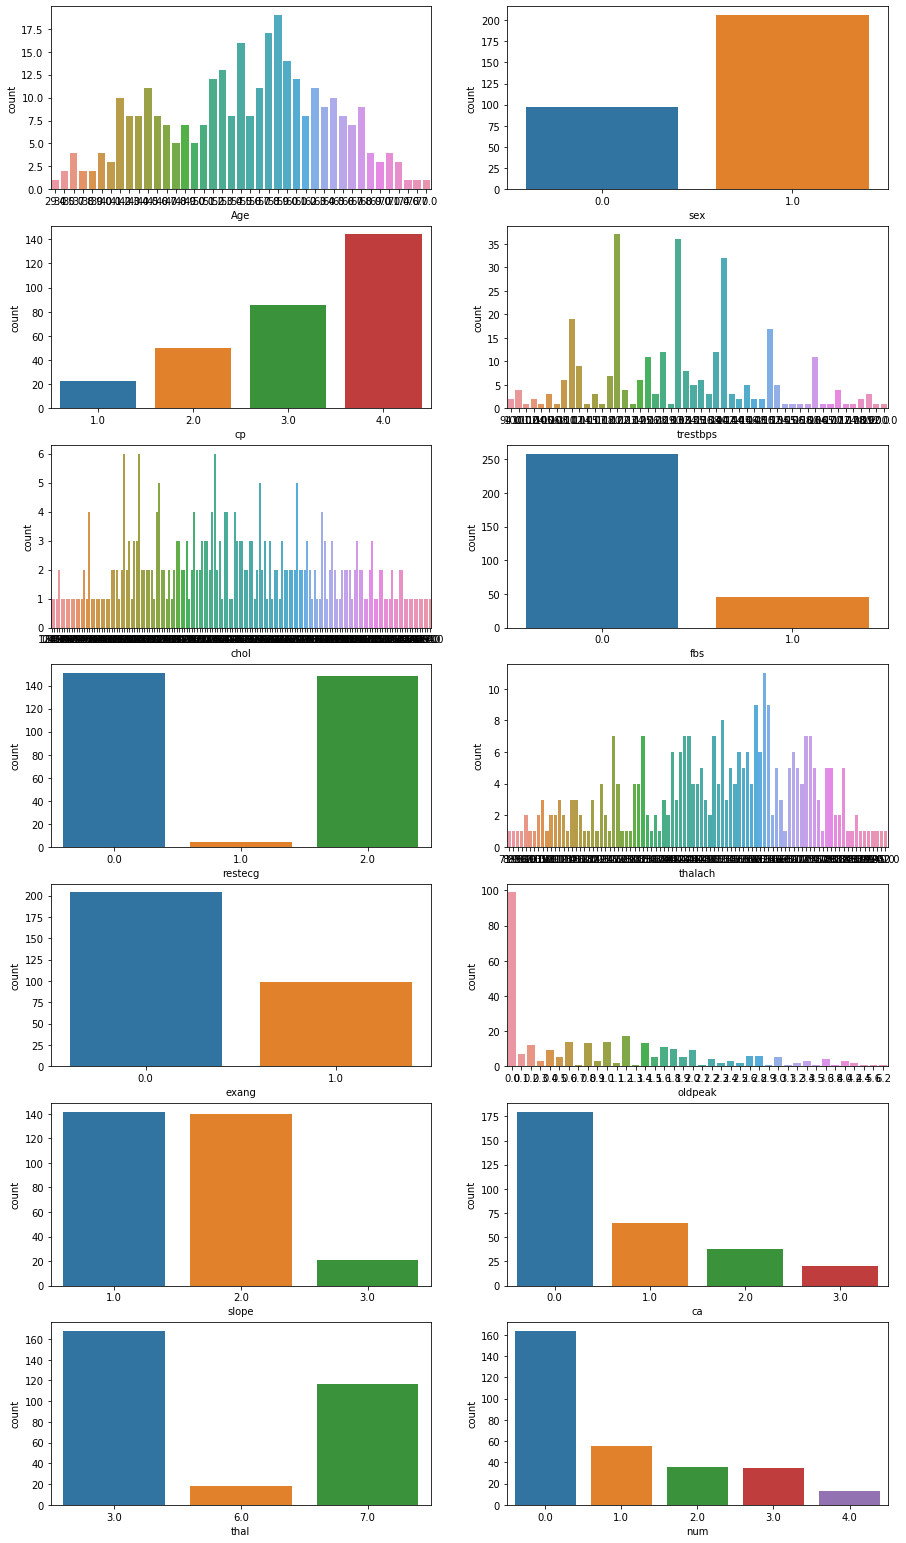

In [14]:
#creating barplot of colums to check the count of indivisual value
figure(num=None,figsize=(15,80))
for column_index,col in enumerate(scp.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(x=scp[col],data=scp)

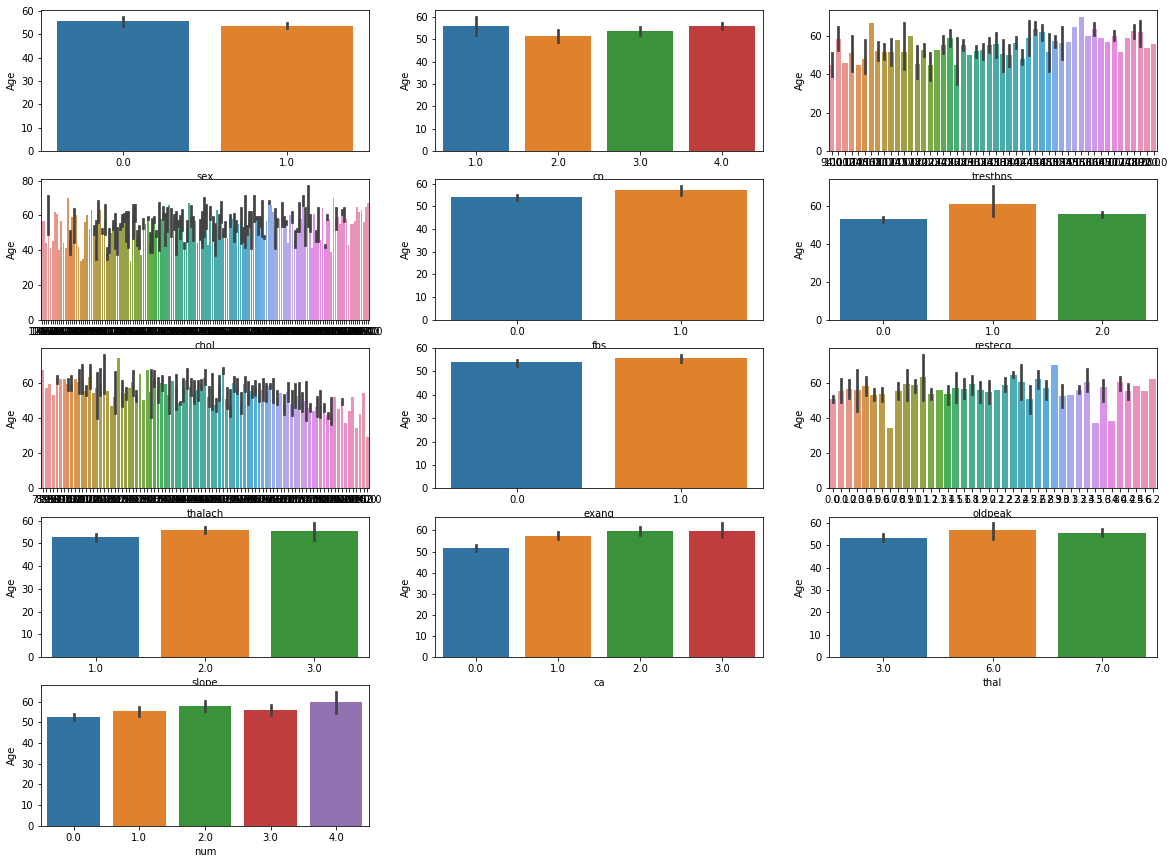

In [15]:
# creating bar plot of colums with respect to holiday to check distribution among holiday
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'Age':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(y='Age', x=column, data=scp)

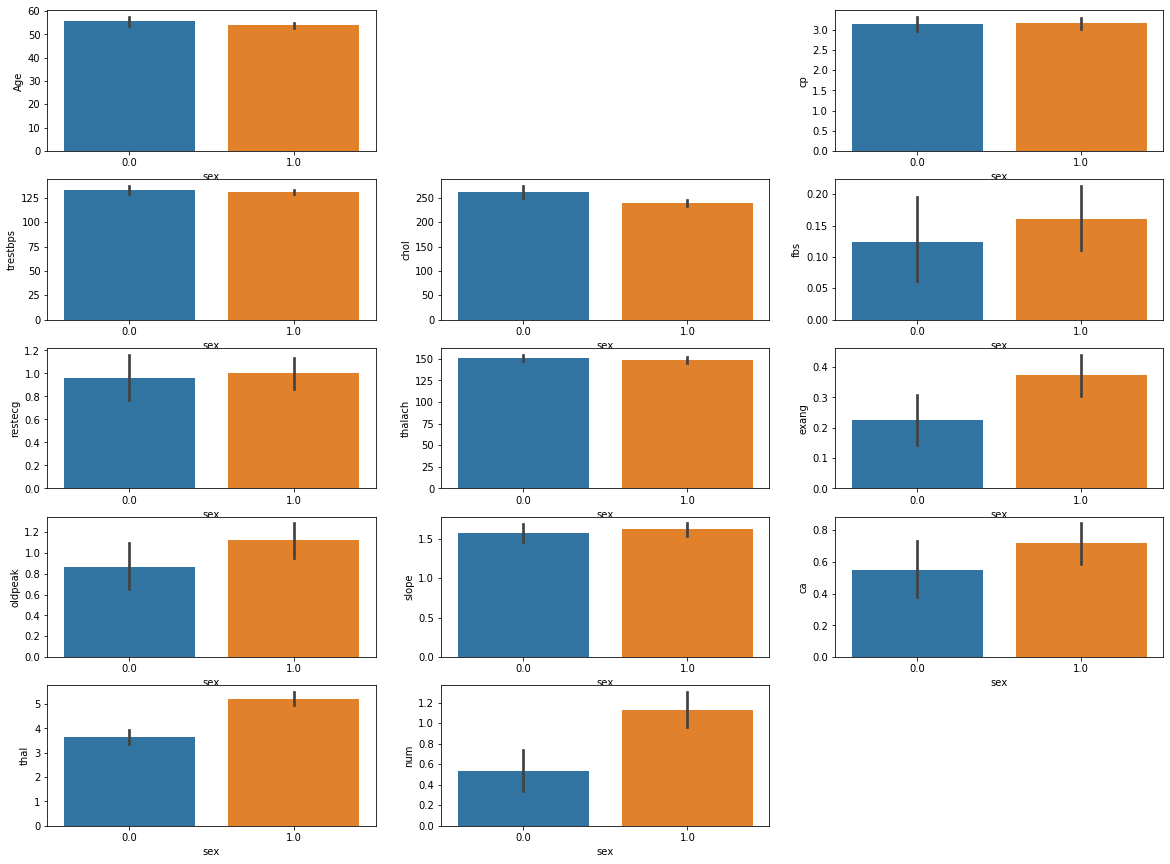

In [16]:
# creating bar plot of colums with respect to sex to check distribution among sex
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'sex':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='sex', y=column, data=scp)

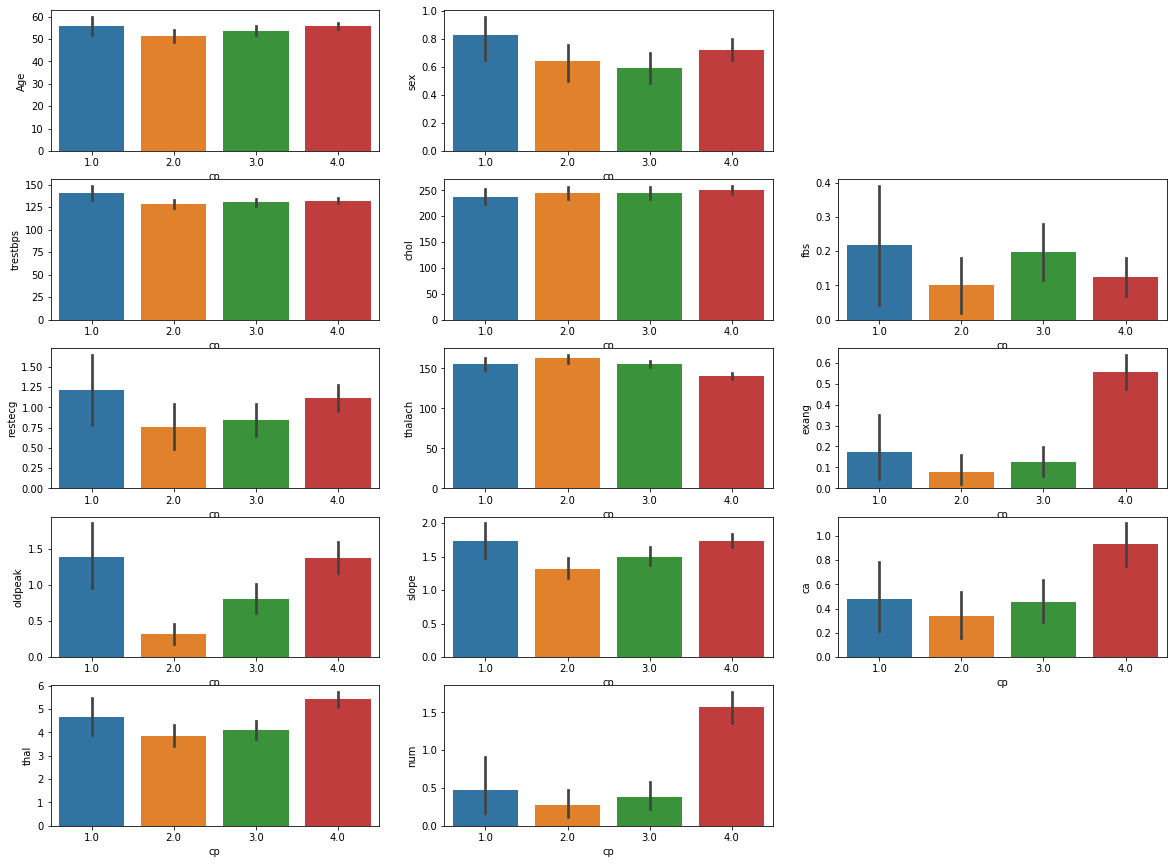

In [17]:
# creating bar plot of colums with respect to cp to check distribution among cp
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'cp':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='cp', y=column, data=scp)

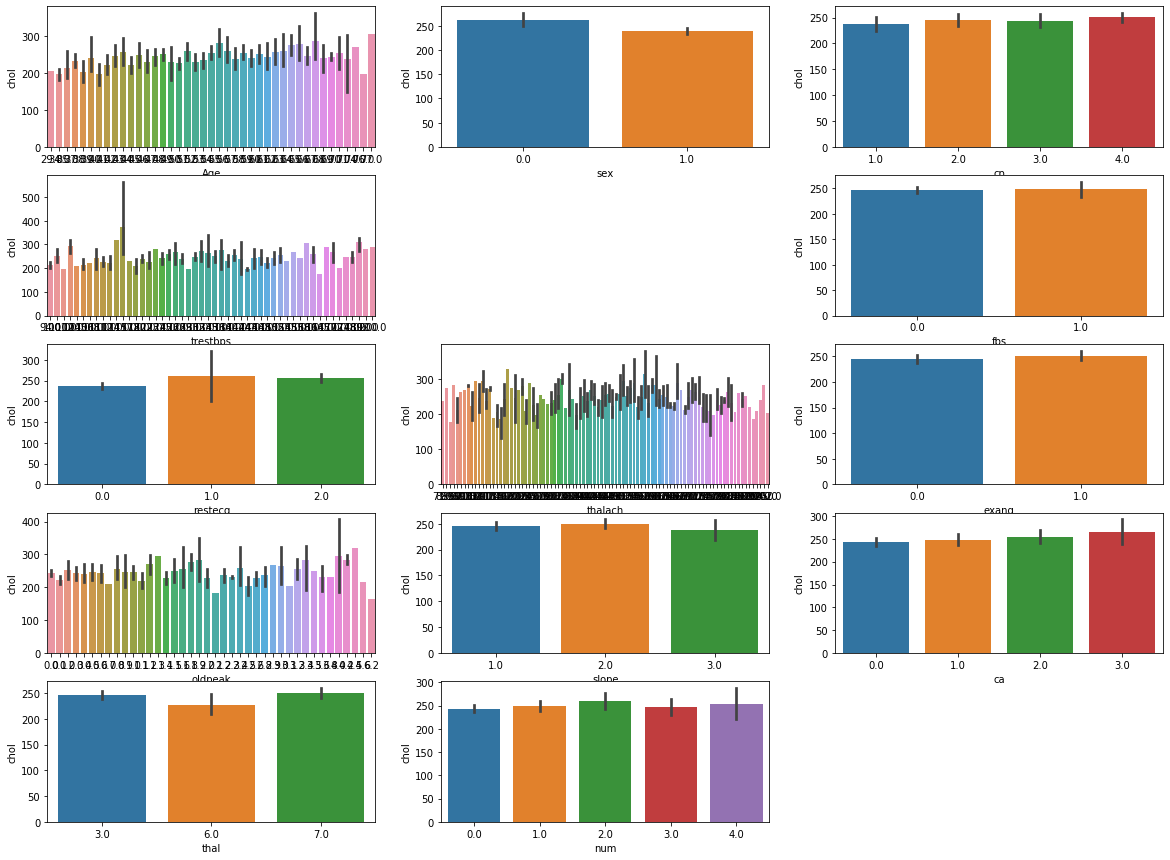

In [18]:
# creating bar plot of colums with respect to chol to check distribution among chol
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'chol':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(y='chol', x=column, data=scp)

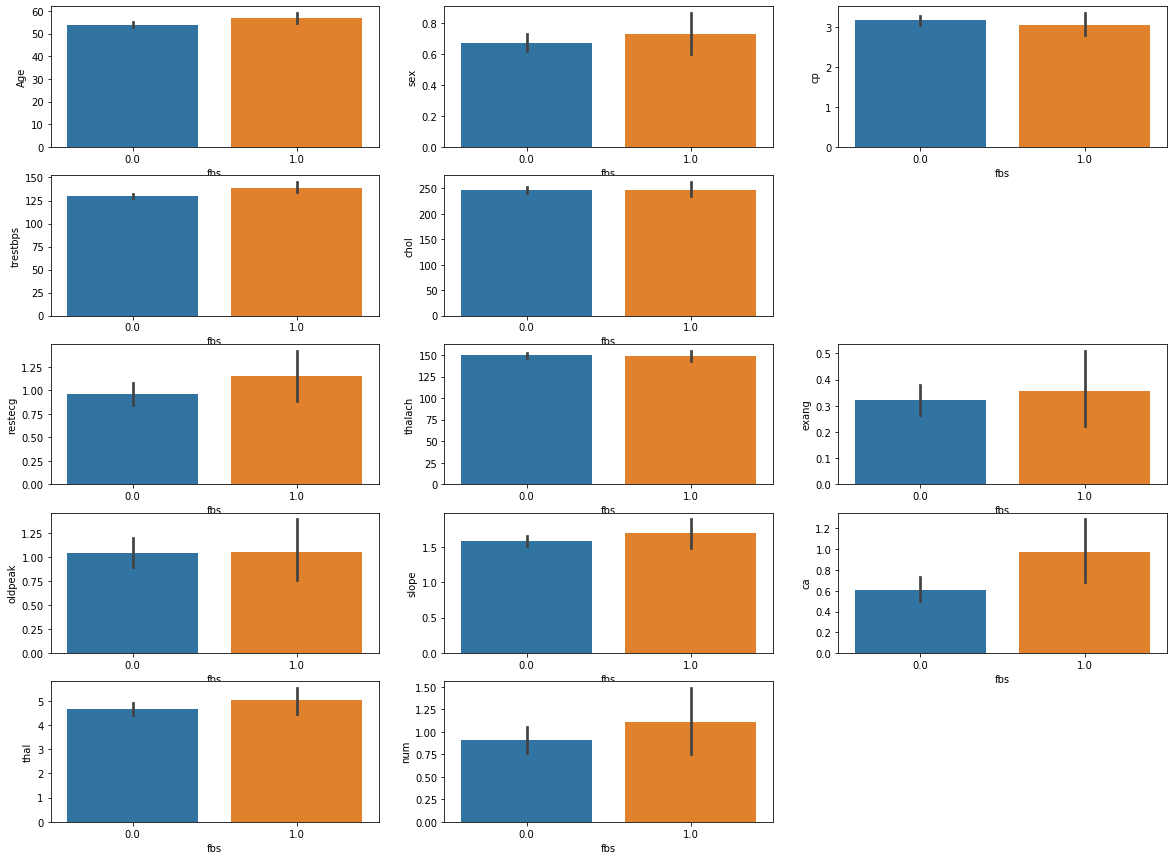

In [19]:
# creating bar plot of colums with respect to fbs to check distribution among fbs
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'fbs':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='fbs', y=column, data=scp)

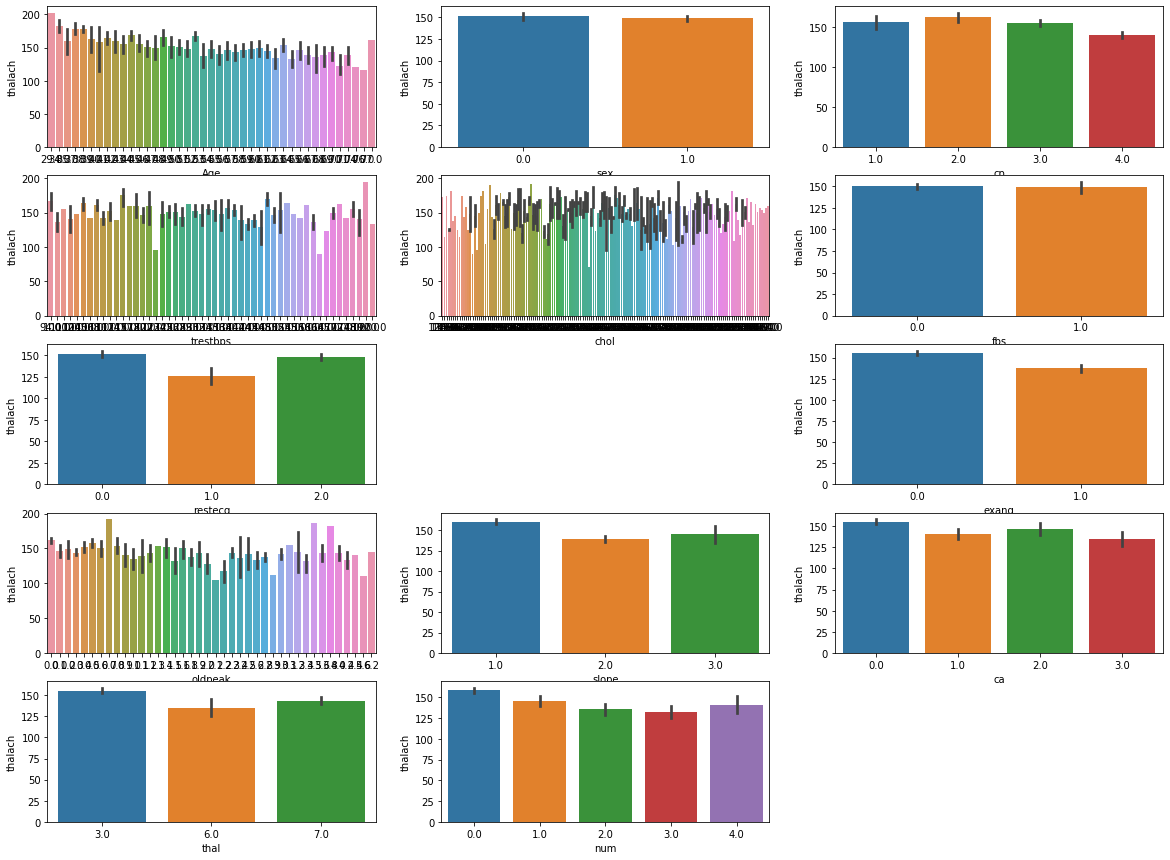

In [20]:
# creating bar plot of colums with respect to thalach to check distribution among thalach
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'thalach':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(y='thalach', x=column, data=scp)

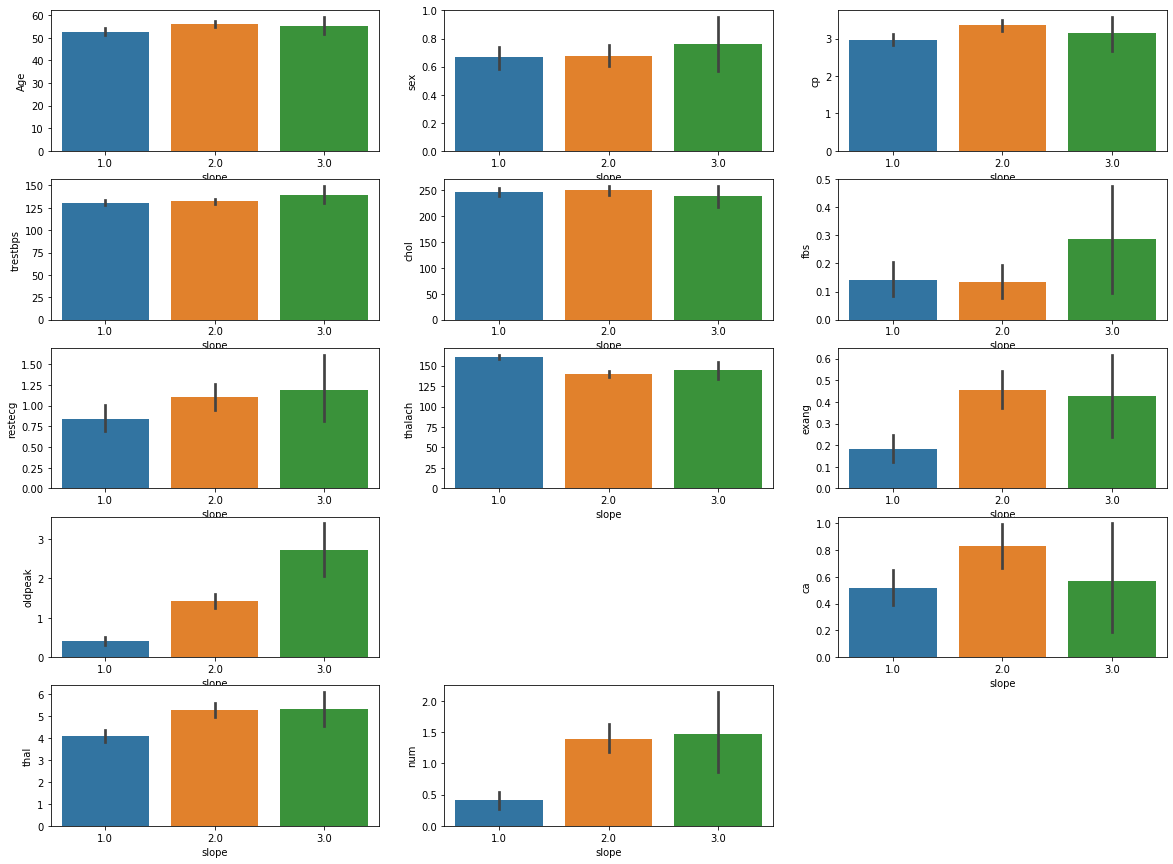

In [21]:
# creating bar plot of colums with respect to slope to check distribution among slope
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'slope':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='slope', y=column, data=scp)

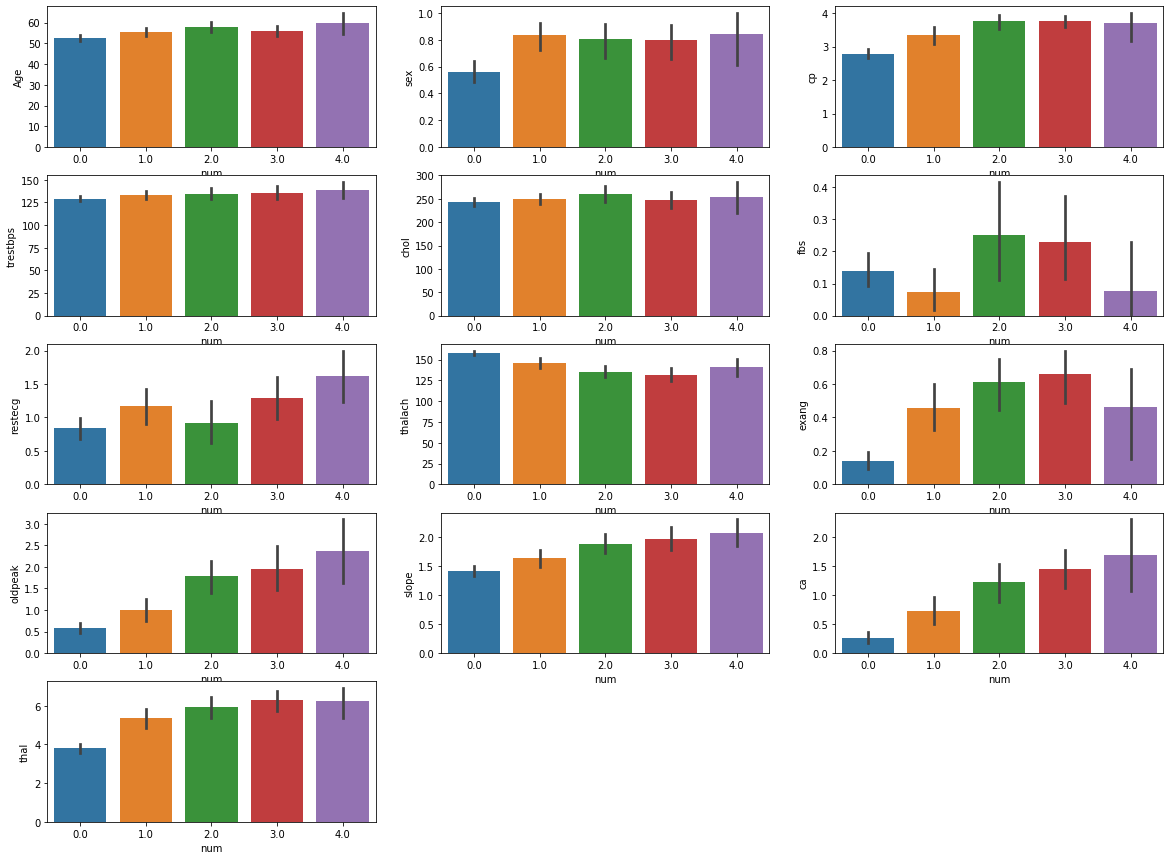

In [22]:
# creating bar plot of colums with respect to num to check distribution among num
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'num':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='num', y=column, data=scp)

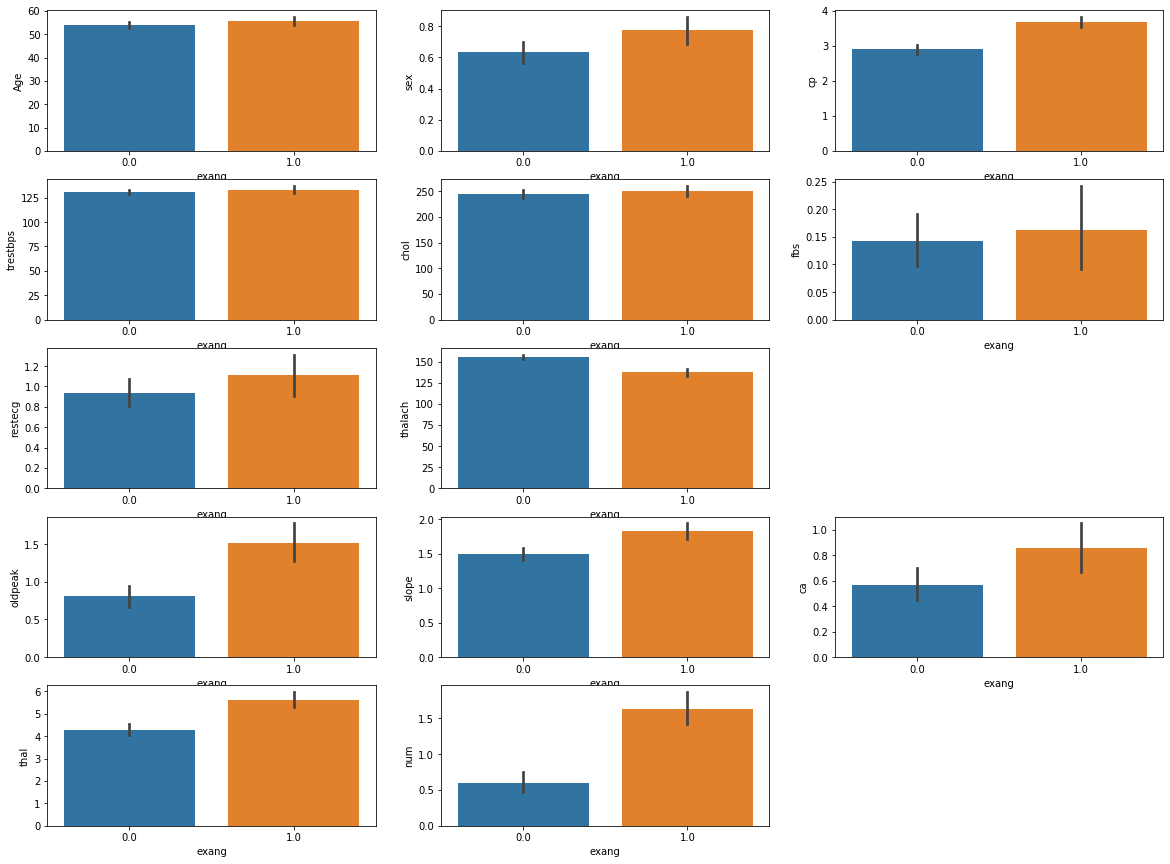

In [23]:
# creating bar plot of colums with respect to exang to check distribution among exang
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(scp.columns):
    if column == 'exang':
        continue
    plt.subplot(5, 3, column_index+1)
    sns.barplot(x='exang', y=column, data=scp)

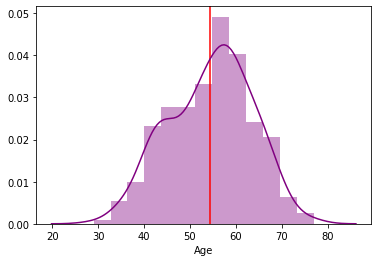

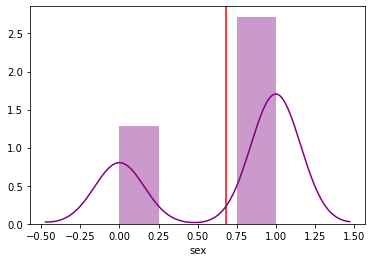

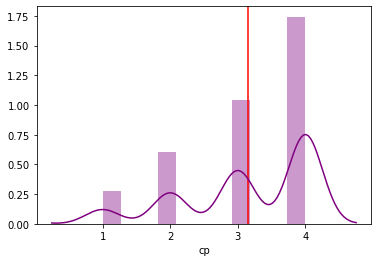

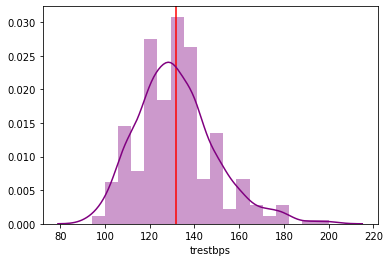

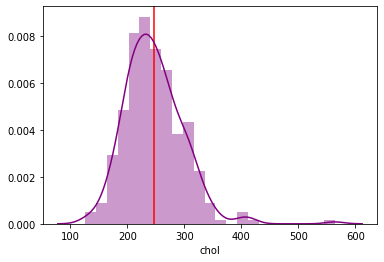

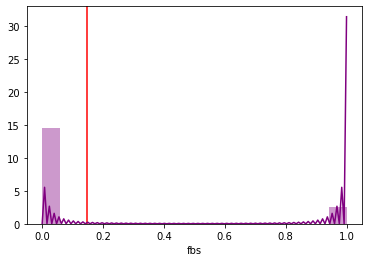

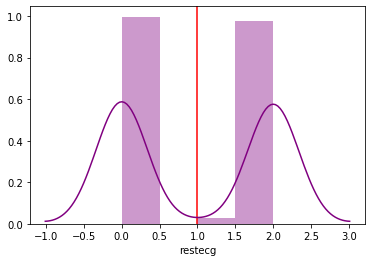

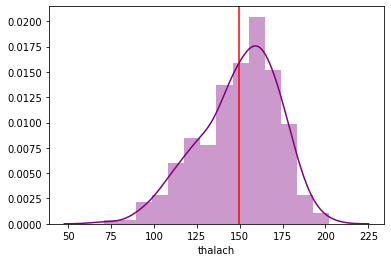

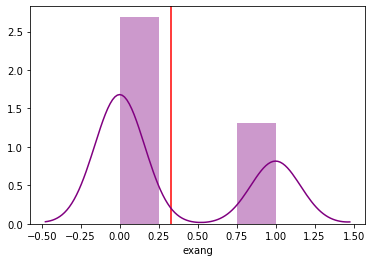

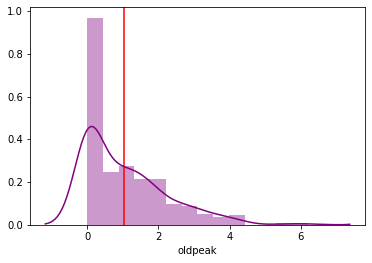

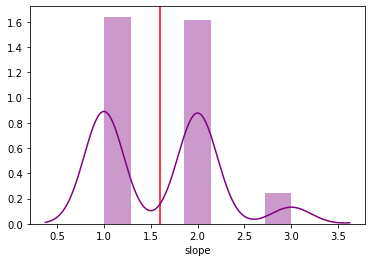

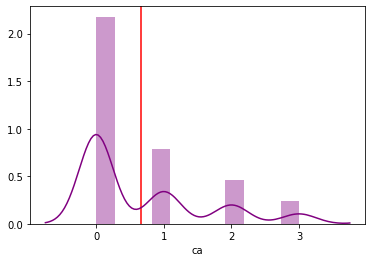

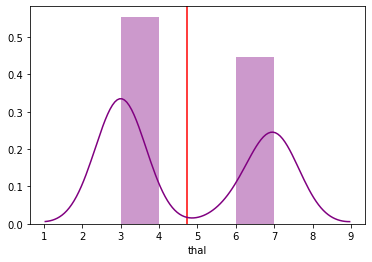

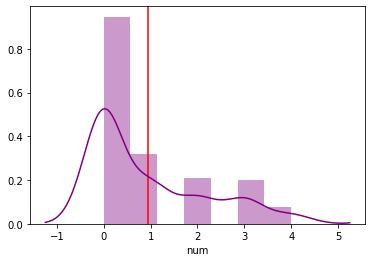

In [24]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(scp):
    plt.figure(i)
    plt.axvline(scp[col].mean(),color = 'r')
    sns.distplot(scp[col],color='purple')

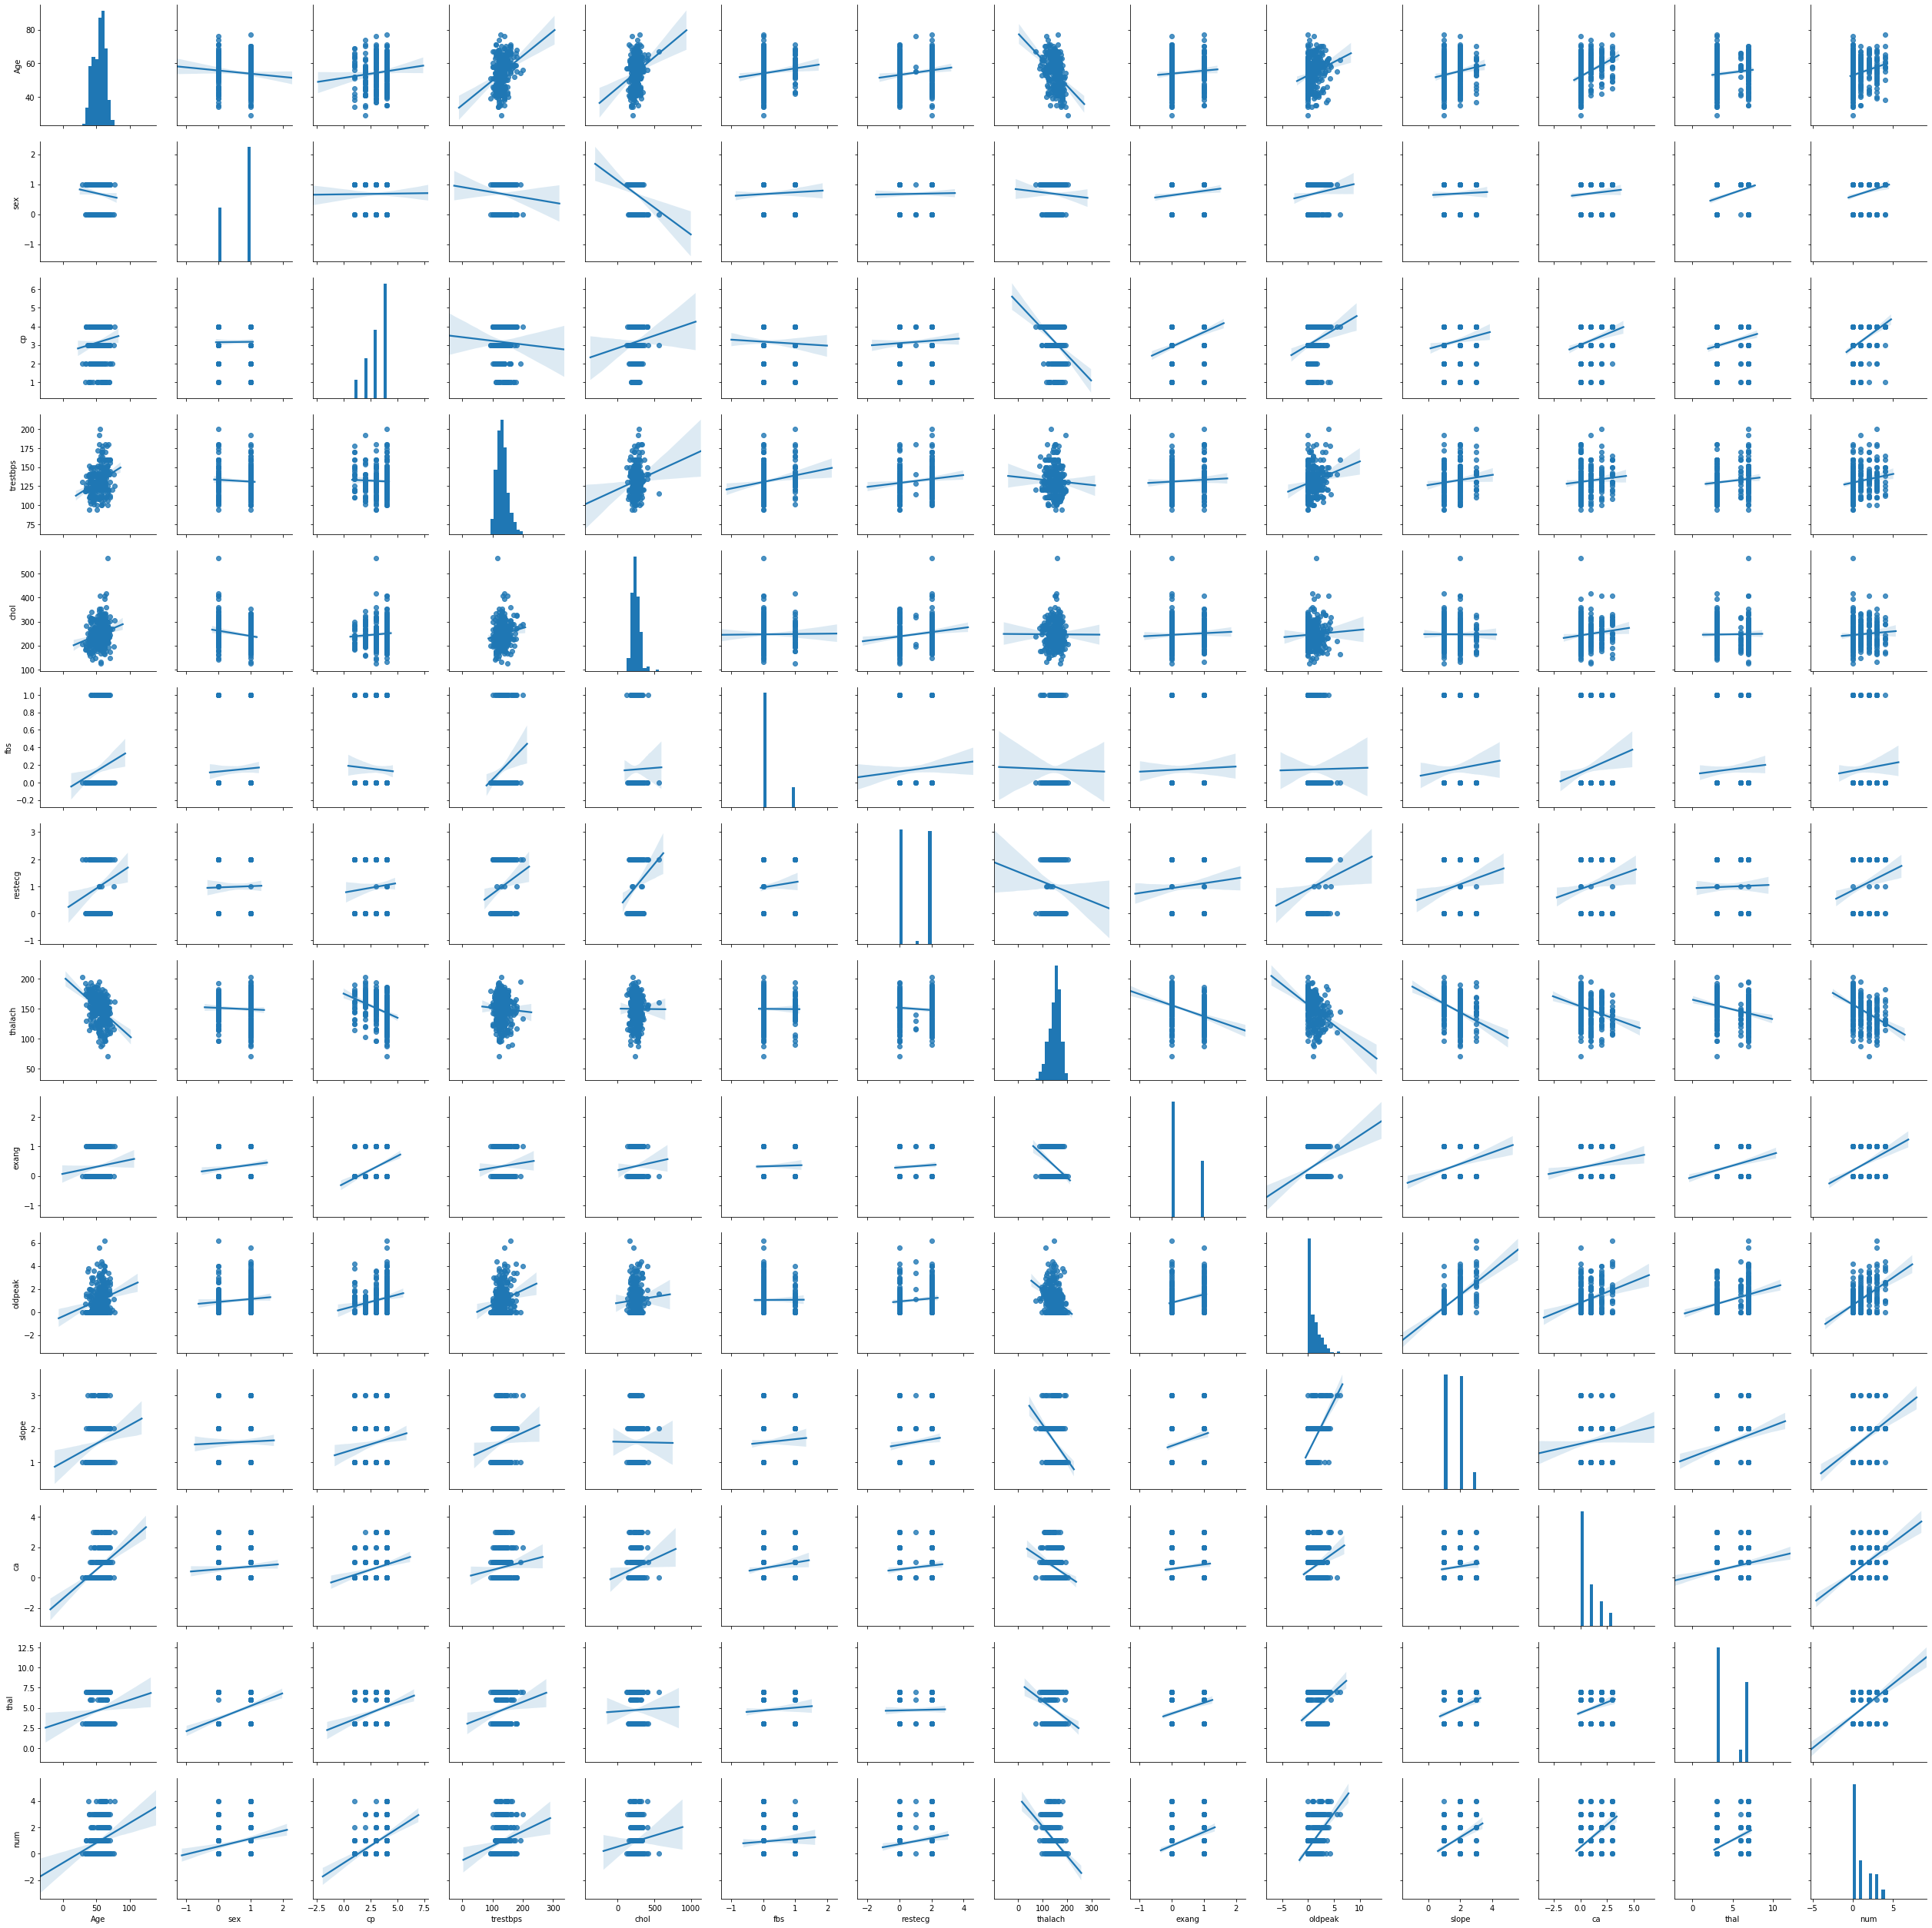

In [25]:
# pair plot to see the scatter of data
sns.pairplot(scp, kind='reg')

Age            AxesSubplot(0.125,0.772143;0.227941x0.107857)
sex         AxesSubplot(0.398529,0.772143;0.227941x0.107857)
cp          AxesSubplot(0.672059,0.772143;0.227941x0.107857)
trestbps       AxesSubplot(0.125,0.642714;0.227941x0.107857)
chol        AxesSubplot(0.398529,0.642714;0.227941x0.107857)
fbs         AxesSubplot(0.672059,0.642714;0.227941x0.107857)
restecg        AxesSubplot(0.125,0.513286;0.227941x0.107857)
thalach     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
exang       AxesSubplot(0.672059,0.513286;0.227941x0.107857)
oldpeak        AxesSubplot(0.125,0.383857;0.227941x0.107857)
slope       AxesSubplot(0.398529,0.383857;0.227941x0.107857)
ca          AxesSubplot(0.672059,0.383857;0.227941x0.107857)
thal           AxesSubplot(0.125,0.254429;0.227941x0.107857)
num         AxesSubplot(0.398529,0.254429;0.227941x0.107857)
dtype: object

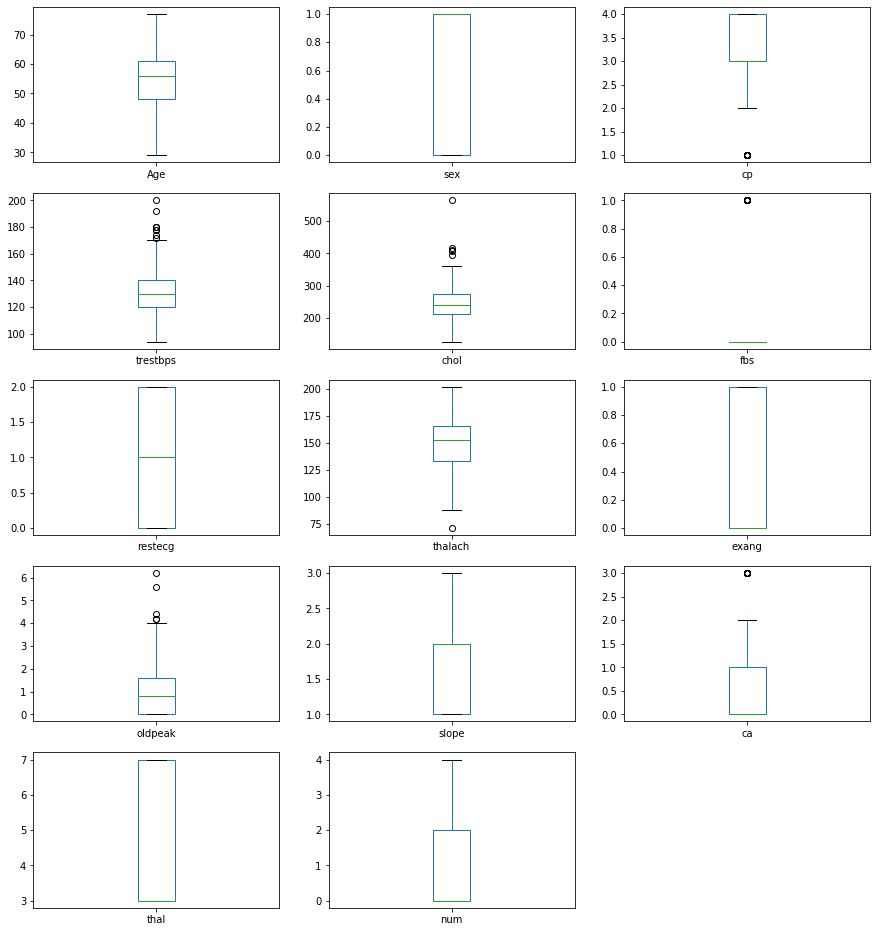

In [26]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
scp.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

###### Manipulating data before bulding the model

In [27]:
#Label encoding data
scp['num']=scp['num'].apply(lambda x: 0 if x==0 else 1)
scp.sample(5)

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
261,58.0,0.0,2.0,136.0,319.0,1.0,2.0,152.0,0.0,0.0,1.0,2.0,3.0,1
105,54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0
172,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
199,59.0,1.0,1.0,160.0,273.0,0.0,2.0,125.0,0.0,0.0,1.0,0.0,3.0,1
247,47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0,1


In [28]:
#removing outlires
z=abs(zscore(scp))
print(scp.shape)
scp=scp.loc[(z<3).all(axis=1)]
print(scp.shape)

(303, 14)
(294, 14)


In [29]:
# dividing dataset into input values 'x' and output value 'y'
x=scp.iloc[:,0:-1]
print('x dataset\n',x.head(),'\n')
y=scp.iloc[:,-1]
print('y datase\n',y.head())

x dataset
     Age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  
0    3.0  0.0   6.0  
1    2.0  3.0   3.0  
2    2.0  2.0   7.0  
3    3.0  0.0   3.0  
4    1.0  0.0   3.0   

y datase
 0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64


In [30]:
#checking skewness
x.skew()

Age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     1.012591
slope       0.506177
ca          1.246304
thal        0.299471
dtype: float64

In [31]:
#removing skewness
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
for col in x.columns:       
     if x.skew().loc[col]<-0.55:
        x[col]=np.power(x[col],2)
        
x.skew()

Age        -0.179588
sex        -0.828274
cp         -0.415393
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     0.360728
slope       0.506177
ca          0.802482
thal        0.299471
dtype: float64

In [32]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe classification model, to find out the best model


In [33]:
#creating models array with all the model, along with few blank array for further use
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [34]:
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
# loop to find out the maximum accuracy of all the model in models array along the range of random state
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [35]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
0,SVC,0.949153,21
1,GaussianNB,0.932203,17
2,SGDClassifier,0.932203,21
3,LogisticRegression,0.932203,13
6,LinearDiscriminantAnalysis,0.932203,17
9,QuadraticDiscriminantAnalysis,0.932203,81
4,DecisionTreeClassifier,0.915254,12
8,KNeighborsClassifier,0.915254,13
5,GradientBoostingClassifier,0.898305,30
7,RandomForestClassifier,0.898305,30


###### Conclusion
On basis of accuracy SVC model is performing the best with maximum accuracy score closly followed by GaussianNB

In [36]:
Cross_val_score_array=[]
Standard_Deviation=[]
# loop to find out the cross_val_score of all the model in models array along the range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [37]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
6,LinearDiscriminantAnalysis,0.846437,0.067760
1,GaussianNB,0.843333,0.072339
3,LogisticRegression,0.832759,0.082224
0,SVC,0.825632,0.099681
8,KNeighborsClassifier,0.819310,0.071682
9,QuadraticDiscriminantAnalysis,0.808966,0.075111
2,SGDClassifier,0.805747,0.100767
5,GradientBoostingClassifier,0.805402,0.107081
7,RandomForestClassifier,0.795172,0.082422
4,DecisionTreeClassifier,0.727011,0.069350


###### Conclusion
On basis of Crossval score for accuracy LinearDiscriminantAnalysis model is performing the best with maximum Crossval score closly followed by GaussianNB

###### On basis of our compression of accuracy and Cross val score i choose GaussianNB model since it performing best on given data

In [38]:
#using grid search to improve model..
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
mod=GaussianNB()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=3)
grid_result=grid.fit(x,y)

In [39]:
grid_result.best_score_

0.8503401360544217

In [40]:
grid_result.best_params_

{'var_smoothing': 0.12328467394420659}

In [41]:
grid_result.best_estimator_

GaussianNB(priors=None, var_smoothing=0.12328467394420659)

Model score is: 0.825531914893617 

Accuracy score of model is :  0.9322033898305084 

Precision score of model is : 0.8928571428571429 

Recall score of model is : 0.9615384615384616 

Log loss score of model is : 2.341652616473447 

F1_score score of model is : 0.9259259259259259 

The mean of cross_val_score for themodel is: 0.8505005561735262 

Confusion matrix for the model is : 
 [[30  3]
 [ 1 25]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59
 



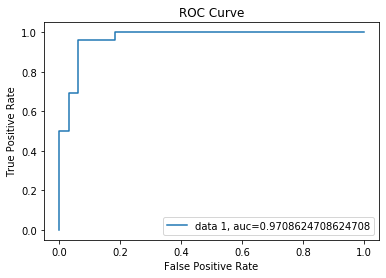

In [42]:
#final classification model
lr=GaussianNB(priors=None, var_smoothing=0.12328467394420659)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=17,stratify=y,shuffle=True)
lr.fit(train_x,train_y)
pred=lr.predict(test_x)
predict_proba = lr.predict_proba(test_x)[::,1]
score=cross_val_score(lr,x,y,cv=10,scoring='accuracy').mean()

print('Model score is:',lr.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('Log loss score of model is :',log_loss(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')
print('The mean of cross_val_score for themodel is:',score,'\n')
print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 10 Heart Disease.csv')

In [44]:
# saving the model using pickle.
joblib.dump(lr,'lr_Project 10 Heart Disease.pkl')

['lr_Project 10 Heart Disease.pkl']